In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv',index_col = 'RowNumber')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
3534,15808557,Mancini,695,France,Female,42,5,0.00,1,0,1,72172.13,1
1977,15694192,Nwankwo,598,Spain,Female,38,6,0.00,2,0,0,173783.38,0
1273,15756539,Marshall,585,Germany,Female,39,7,165610.41,2,0,0,131852.01,0
6404,15736126,Sung,850,Germany,Male,55,0,98710.89,1,1,1,83617.17,1
531,15736112,Walton,519,Spain,Female,57,2,119035.35,2,1,1,29871.79,0
4807,15617252,Lung,697,France,Female,33,1,87347.70,1,1,0,172524.51,0
4458,15743617,Chesnokova,713,Germany,Male,47,1,95994.98,1,1,0,197529.23,0
7623,15796413,Green,794,France,Male,46,6,0.00,2,1,0,195325.74,0
6978,15711571,Y?,587,Spain,Male,42,5,120233.83,1,1,0,194890.33,0


In [5]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df = df.drop(columns = ['CustomerId', 'Surname'])

In [11]:
df = pd.get_dummies(df,columns = ['Geography', 'Gender'], drop_first = True)

In [12]:
df['Gender_Male'] = df['Gender_Male'].replace({True:1, False:0})
df['Geography_Germany'] = df['Geography_Germany'].replace({True: 1, False: 0})
df['Geography_Spain'] = df['Geography_Spain'].replace({True: 1, False: 0})

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
RowNumber,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train, Y_test = train_test_split(df.drop(columns = ['Exited']),df['Exited'], random_state = 42, test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_train = scaler1.fit_transform(X_train)
X_test= scaler1.transform(X_test)


In [17]:
X_train.shape

(8000, 11)

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
 

In [42]:
model.add(Dense(11,activation = 'relu', input_dim = 11))
model.add(Dense( 11,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'Adam',metrics = ['accuracy'])
history = model.fit(X_train,Y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 0.6464 - accuracy: 0.8261 - val_loss: 0.6111 - val_accuracy: 0.8569
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5779 - accuracy: 0.8669 - val_loss: 0.5571 - val_accuracy: 0.8594
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5301 - accuracy: 0.8667 - val_loss: 0.5206 - val_accuracy: 0.8569
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.8695 - val_loss: 0.4885 - val_accuracy: 0.8569
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.8695 - val_loss: 0.4646 - val_accuracy: 0.8556
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8695 - val_loss: 0.4441 - val_accuracy: 0.8581
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8709 - val_loss: 0.4014 - val_accuracy: 0.8575

In [43]:
## All Weights
model.layers[0].get_weights() # 0 means o th layer

[array([[ 0.5896937 ,  0.25821537,  0.43093342,  0.00553214,  0.12496218,
         -0.27694395,  0.15887077, -0.02204023,  0.10739853, -0.20252606,
         -0.05350953],
        [-0.27912027,  0.5082663 , -0.01827739,  0.57681525,  0.04921279,
         -0.08558203, -0.21882083,  0.25478497, -0.6792386 , -0.51345664,
         -0.9118254 ],
        [-0.10379399,  0.06825204, -0.433834  , -0.02770161,  0.07624724,
         -0.1594847 ,  0.01831225,  0.016646  , -0.13350038,  0.2580444 ,
         -0.18767412],
        [-0.42751265, -0.92959994, -0.5408453 ,  0.02539528, -0.7082558 ,
         -0.36551008,  0.12084296,  0.06369425, -0.00375397, -0.60902715,
         -0.29890367],
        [-0.44356748, -0.02889567, -0.01599193, -1.0184689 , -0.9343885 ,
          0.10900227, -0.65046036,  1.0571756 ,  0.3509104 ,  0.3584593 ,
         -0.43138492],
        [ 0.14049183,  0.01666732,  0.4680599 , -0.04520733, -0.07512639,
         -0.22724226, -0.21447499, -0.11594474,  0.4112171 , -0.3529258

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
 dense_12 (Dense)            (None, 11)                22        
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 442 (1.73 KB)
Trainable params: 442 (1.7

In [39]:
y_log = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [40]:
y_predict = np.where(y_log>0.5, 1,0)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_predict)

0.8615

In [45]:
import matplotlib.pyplot as plt


In [48]:
history.history

{'loss': [0.6464137434959412,
  0.5779095888137817,
  0.5300720930099487,
  0.4920750856399536,
  0.463413268327713,
  0.4398926794528961,
  0.41432732343673706,
  0.36297693848609924,
  0.3451968729496002,
  0.33832037448883057,
  0.3358648419380188,
  0.33480530977249146,
  0.33166399598121643,
  0.33056724071502686,
  0.3301987946033478,
  0.32860270142555237,
  0.32841354608535767,
  0.3270646631717682,
  0.3259458541870117,
  0.32551300525665283,
  0.3253832161426544,
  0.3257123529911041,
  0.32509028911590576,
  0.32383573055267334,
  0.3237135410308838,
  0.3235187828540802,
  0.3234539330005646,
  0.3227022588253021,
  0.3230555057525635,
  0.3228722810745239,
  0.3228219747543335,
  0.32274916768074036,
  0.3216576874256134,
  0.3215201497077942,
  0.3216571807861328,
  0.32065877318382263,
  0.3205130100250244,
  0.31977805495262146,
  0.32029324769973755,
  0.3206292986869812,
  0.31978046894073486,
  0.31914687156677246,
  0.31965792179107666,
  0.318953275680542,
  0.3194

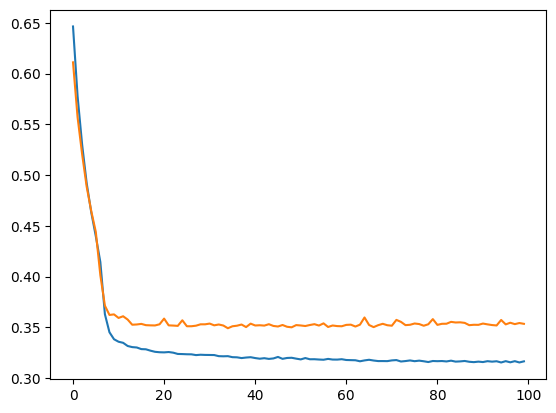

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

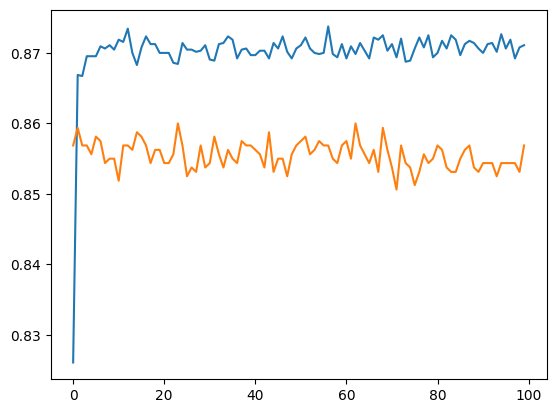

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])